In [1]:
points = [
    (0,0),
    (0.5,0),
    (0.5,6.44),
    (6,0),
    (6,8),
    (5.5,8),
    (5.5, 1.58),
    (0, 8) 
]

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

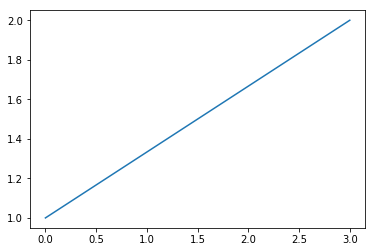

In [29]:
plt.plot([0,3],[1,2])

In [27]:
def draw_segment(segments):
    for i,seg in enumerate(segments):
        _next = segments[(i+1)%len(segments)]
        x1,y1 = seg
        s=seg
        print(s)
        x2,y2 = _next
        plt.plot([x1,x2],[y1,y2])

(0, 0)
(0.5, 0)
(0.5, 6.44)
(6, 0)
(6, 8)
(5.5, 8)
(5.5, 1.58)
(0, 8)


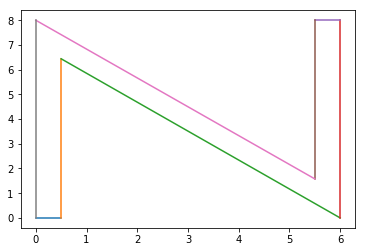

In [28]:
draw_segment(points)

In [13]:
import numpy as np
points_matrix = np.array(points)

In [16]:
transform = np.array([[1,0.4],[0.8,1]])

[0.0, 0.0]
[0.5, 0.20000000000000001]
[5.652000000000001, 6.6400000000000006]
[6.0, 2.4000000000000004]
[12.4, 10.4]
[11.9, 10.199999999999999]
[6.7640000000000002, 3.7800000000000002]
[6.4000000000000004, 8.0]


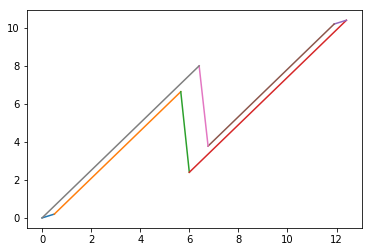

In [23]:
tranformed = np.dot(points_matrix, transform)
draw_segment([list(t) for t in tranformed])

In [24]:
[list(t) for t in tranformed]

[[0.0, 0.0],
 [0.5, 0.20000000000000001],
 [5.652000000000001, 6.6400000000000006],
 [6.0, 2.4000000000000004],
 [12.4, 10.4],
 [11.9, 10.199999999999999],
 [6.7640000000000002, 3.7800000000000002],
 [6.4000000000000004, 8.0]]

## Dynamic System
某个草原： 100只黄鼠狼，200只兔子，

第二年黄鼠狼 = 黄数量数量的数量 1.3 + 兔子的数量1.3 第二年兔子 = 兔子的数量 1.7 - 黄数量的数量 0.2

## Probability

In [1]:
import random
def dice():
    return random.randint(1,6)

In [10]:
dice()

5

In [11]:
occurences = [
    (i,j) for i in range(1,6+1) for j in range(1,6+1)
]

In [12]:
occurences

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)]

## 至少出现一次3的概率是多少呢？

In [13]:
events = [(a,b) for a,b in occurences if a==3 or b==3]

In [18]:
def probability(events, occurences):
    return len(set(events)) / len(set(occurences))

In [19]:
probability(events, occurences)

0.3055555555555556

## 如果我第一次出现的是1，name第二次出现3的概率是多少呢

In [20]:
first_is_one = [
    (a,b) for a,b in occurences if a==1
]

In [21]:
first_is_one

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6)]

In [22]:
second_is_three = [
    (a,b) for a,b in first_is_one if b==3
]

In [23]:
second_is_three

[(1, 3)]

In [24]:
probability(second_is_three, first_is_one)

0.16666666666666666

# Bayes

## centeral limitation theory

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
from statistics import mean
from random import normalvariate, triangular, choice, vonmisesvariate, uniform

def normal(mu=0, sigma=1):
    return random.normalvariate(mu,sigma)

def repeated_hist(dist, n=10**6, bins=100):
    "sample the distribution n times and make a histogram of the results."
    samples = [dist() for _ in range(n)] 
    plt.hist(samples, bins=bins,normed=True)
    plt.title('{} (u = {:.1f})'.format(dist.__name__, mean(samples)))
    plt.grid(axis='x')
    plt.yticks([],'')
    plt.show()

In [35]:
normal()

0.2999267923868927

D:\program64\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


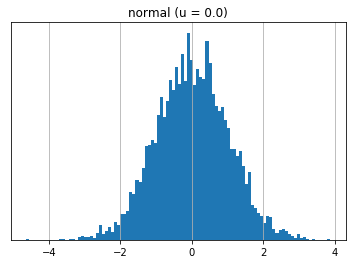

In [37]:
repeated_hist(normal,n=5000)

In [38]:
def sum10dice():
    return sum(random.randint(1,6) for _ in range(10))

In [39]:
sum10dice()

38

D:\program64\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


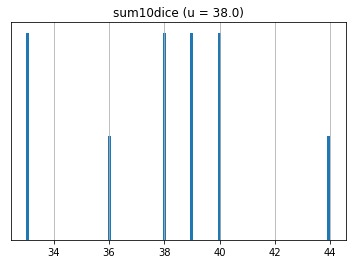

In [40]:
repeated_hist(sum10dice,10)

D:\program64\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


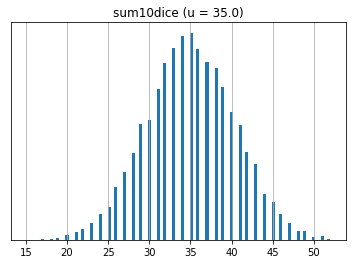

In [42]:
repeated_hist(sum10dice,10000)

Syntree Tree 语法树

In [43]:
grammar = """
句子 = 主语 谓语 宾语
主语 = 数词 形容词 名词
谓语 = 看着 | 听着 | 想着
宾语 = 数词 形容词 名词 结束符号
数词 = 1 | 2 | 3 | 4 | 5 | 数词 数词
形容词 = 好看的 | 漂亮的 | 美丽的
名词 = 小猫 | 小狗 | 小兔子
结束符号 = ！！
"""

Tree --> Dynamic Programming

In [45]:
from collections import defaultdict

In [59]:
length_prices = {
    1:1,
    2:5,
    3:8,
    4:9,
    5:10,
    6:17,
    7:17,
    8:20,
    9:24,
    10:30
}

In [60]:
P = defaultdict(int)

In [61]:
for k,v in length_prices.items():
    P[k] = v

In [62]:
solution = {}

In [63]:
from functools import lru_cache

In [64]:
@lru_cache(maxsize = 2*10)
def r(n):
    candidates = [((0,n),P[n])] + [((cut, n-cut),r(cut), r(cut)+ r(n-cut)) for cut in range(1,n)]
    split, value = max(candidates_price, key = lambda x: x[1])
    solution[n] = split
    return value

In [65]:
%%time
solution

Wall time: 0 ns


{}

In [67]:
length = 19
[((i,length - i), length_prices[length - i] + length_prices[i]) for i in range(length+1)]

KeyError: 19